In [8]:
import pandas as pd
from io import StringIO

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [17]:
# read df.csv as df
df = pd.read_csv('df.csv')
cols = ['crew', 'overview']
df = df[cols]
df['crew_id'] = df['crew'].factorize()[0]
crew_id_df = df[['crew', 'crew_id']].drop_duplicates().sort_values('crew_id')
crew_to_id = dict(crew_id_df.values)
id_to_crew = dict(crew_id_df[['crew_id', 'crew']].values)
len(df['crew'].unique())
len(df)
# print len unique crew_id

3307

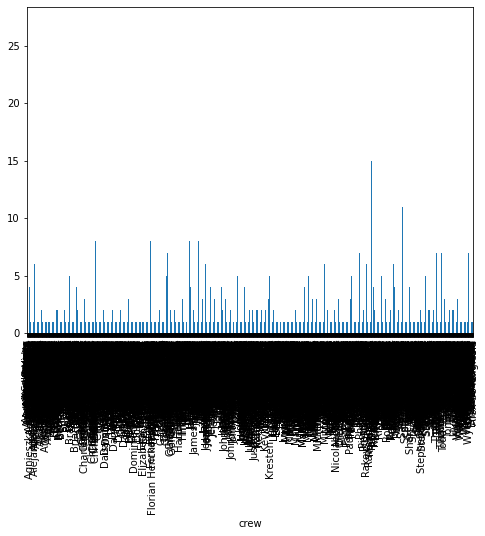

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('crew').overview.count().plot.bar(ylim=0)
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=20, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.overview).toarray()
labels = df.crew_id
features.shape

(3307, 795)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['overview'], df['crew'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)




In [47]:
import random

num = random.randint(0, len(df.overview)-1)
overview_sample = df.overview[num]
print(overview_sample)
prediction = clf.predict(count_vect.transform([overview_sample]))
actual = df.crew[num]
print(actual)
print(prediction)


distant future theodore lonely writer purchases newly developed operating system designed meet users every needs theordores surprise romantic relationship develops operating system unconventional love story blends science fiction romance sweet tale explores nature love ways technology isolates connects us all
Spike Jonze
['Martin Scorsese']


RandomForestClassifier
LinearSVC
MultinomialNB
LogisticRegression


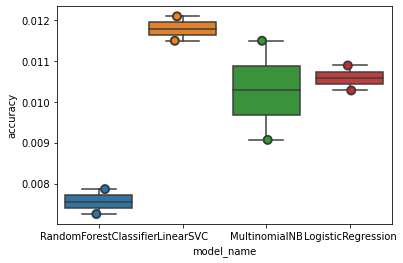

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  print(model_name)
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [50]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.011793
LogisticRegression        0.010584
MultinomialNB             0.010282
RandomForestClassifier    0.007560
Name: accuracy, dtype: float64

In [55]:
# import linearsvc
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
# make a prediction for overview_sample

0.008241758241758242


In [57]:
text_features = tfidf.transform([overview_sample])
prediction = model.predict(text_features)
print(id_to_crew[prediction[0]])


Michael Winterbottom
